In [1]:
import sklearn
import graphviz
import sklearn.tree
import numpy as np
from StringIO import StringIO
from sklearn.naive_bayes import BernoulliNB

In [2]:
file1 = open('house-votes-84.data.txt','r')

In [3]:
mylist = list()

for line in file1:
    newLine = line.rstrip()
    mylist.append(newLine)

file1.close()

In [4]:
#print mylist

In [5]:
myArray = np.array(mylist)

In [6]:
#print myArray

1) discard instances that have missing feature values,
2) treat “missing” as if it is a value (and thus a binary feature becomes a ternary, or three-valued, feature)
3) impute missing values (i.e., for each feature, replace missing values with the most common value for that feature

In [7]:
# 1st senario array

file2 = open('house-votes-84.data.txt','r')
myScenario1List = list()

for line in file2:
    newLine = line.rstrip()
    if '?' not in newLine:
        x = np.array(newLine.split(","))
        myScenario1List.append(x)
        
file2.close()        
myScenario1Array = np.array(myScenario1List)

In [8]:
#print myScenario1Array

In [9]:
myScenario1Array.shape

(232L, 17L)

In [10]:
# 2nd senario is importing original data into 2D np array
myScenario2List = list()
for item in myArray:
    x = np.array(item.split(","))
    myScenario2List.append(x)

myScenario2Array = np.array(myScenario2List)

In [11]:
myScenario2Array.shape

(435L, 17L)

In [12]:
# 3rd senario array
import collections

frequentVote = list()

for item in myScenario2Array.T:
    freq = collections.Counter(item)
    frequentVote.append(freq.most_common(1)[0][0])

print frequentVote


['democrat', 'n', 'y', 'y', 'n', 'y', 'y', 'y', 'y', 'y', 'y', 'n', 'n', 'y', 'y', 'n', 'y']


In [13]:
myScenario3Array = myScenario2Array
index = 0

for i in myScenario3Array:
    for j in range(len(i)):
        if i[j] == '?':
            i[j] = frequentVote[j]
            index = index + 1
            #print myScenario3Array[index][j], index, j

        

In [14]:
#print myScenario3Array


In [15]:
myScenario3Array.shape

(435L, 17L)

In [16]:
#1st scenario
x1 = myScenario1Array[:,1:]
y1 = myScenario1Array[:,0]
x1[x1 == 'n'] = 0
x1[x1 == 'y'] = 1

#2nd scenario
x2 = myScenario2Array[:,1:]
y2 = myScenario2Array[:,0]
x2[x2 == 'n'] = 0
x2[x2 == 'y'] = 1
x2[x2 == '?'] = 2

#3rd scenario
x3 = myScenario3Array[:,1:]
y3 = myScenario3Array[:,0]
x3[x3 == 'n'] = 0
x3[x3 == 'y'] = 1

In [17]:
### Initiate classifier
infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

### Fit classifier
infoGain_clf_tree1 = infoGain_clf.fit(x1, y1)


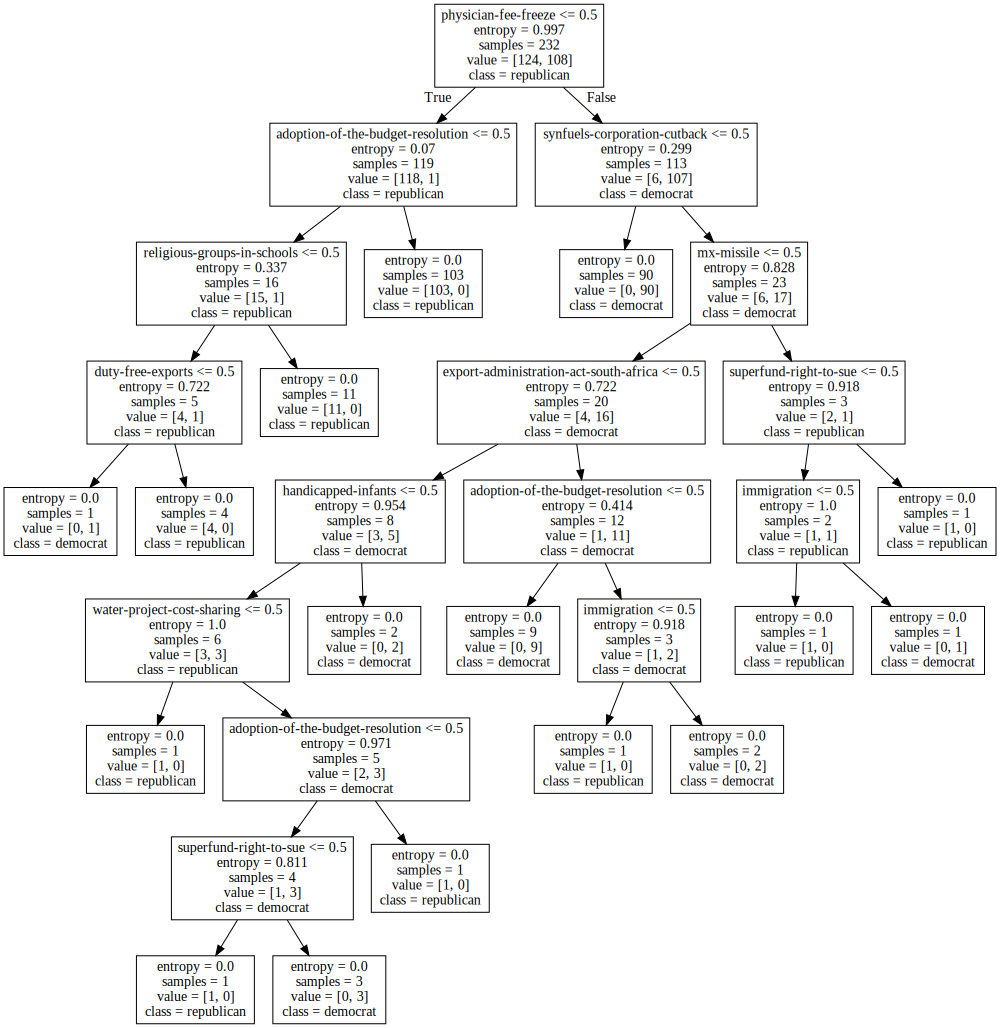

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

ss = StringIO()

col_names="handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze, el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa"
feature_names = np.array(col_names.split(","))
label_name = ["republican","democrat"]

sklearn.tree.export_graphviz(infoGain_clf_tree1, feature_names=feature_names,
                             class_names=label_name,
                             label="all", out_file=ss)
graphviz.Source(ss.getvalue())

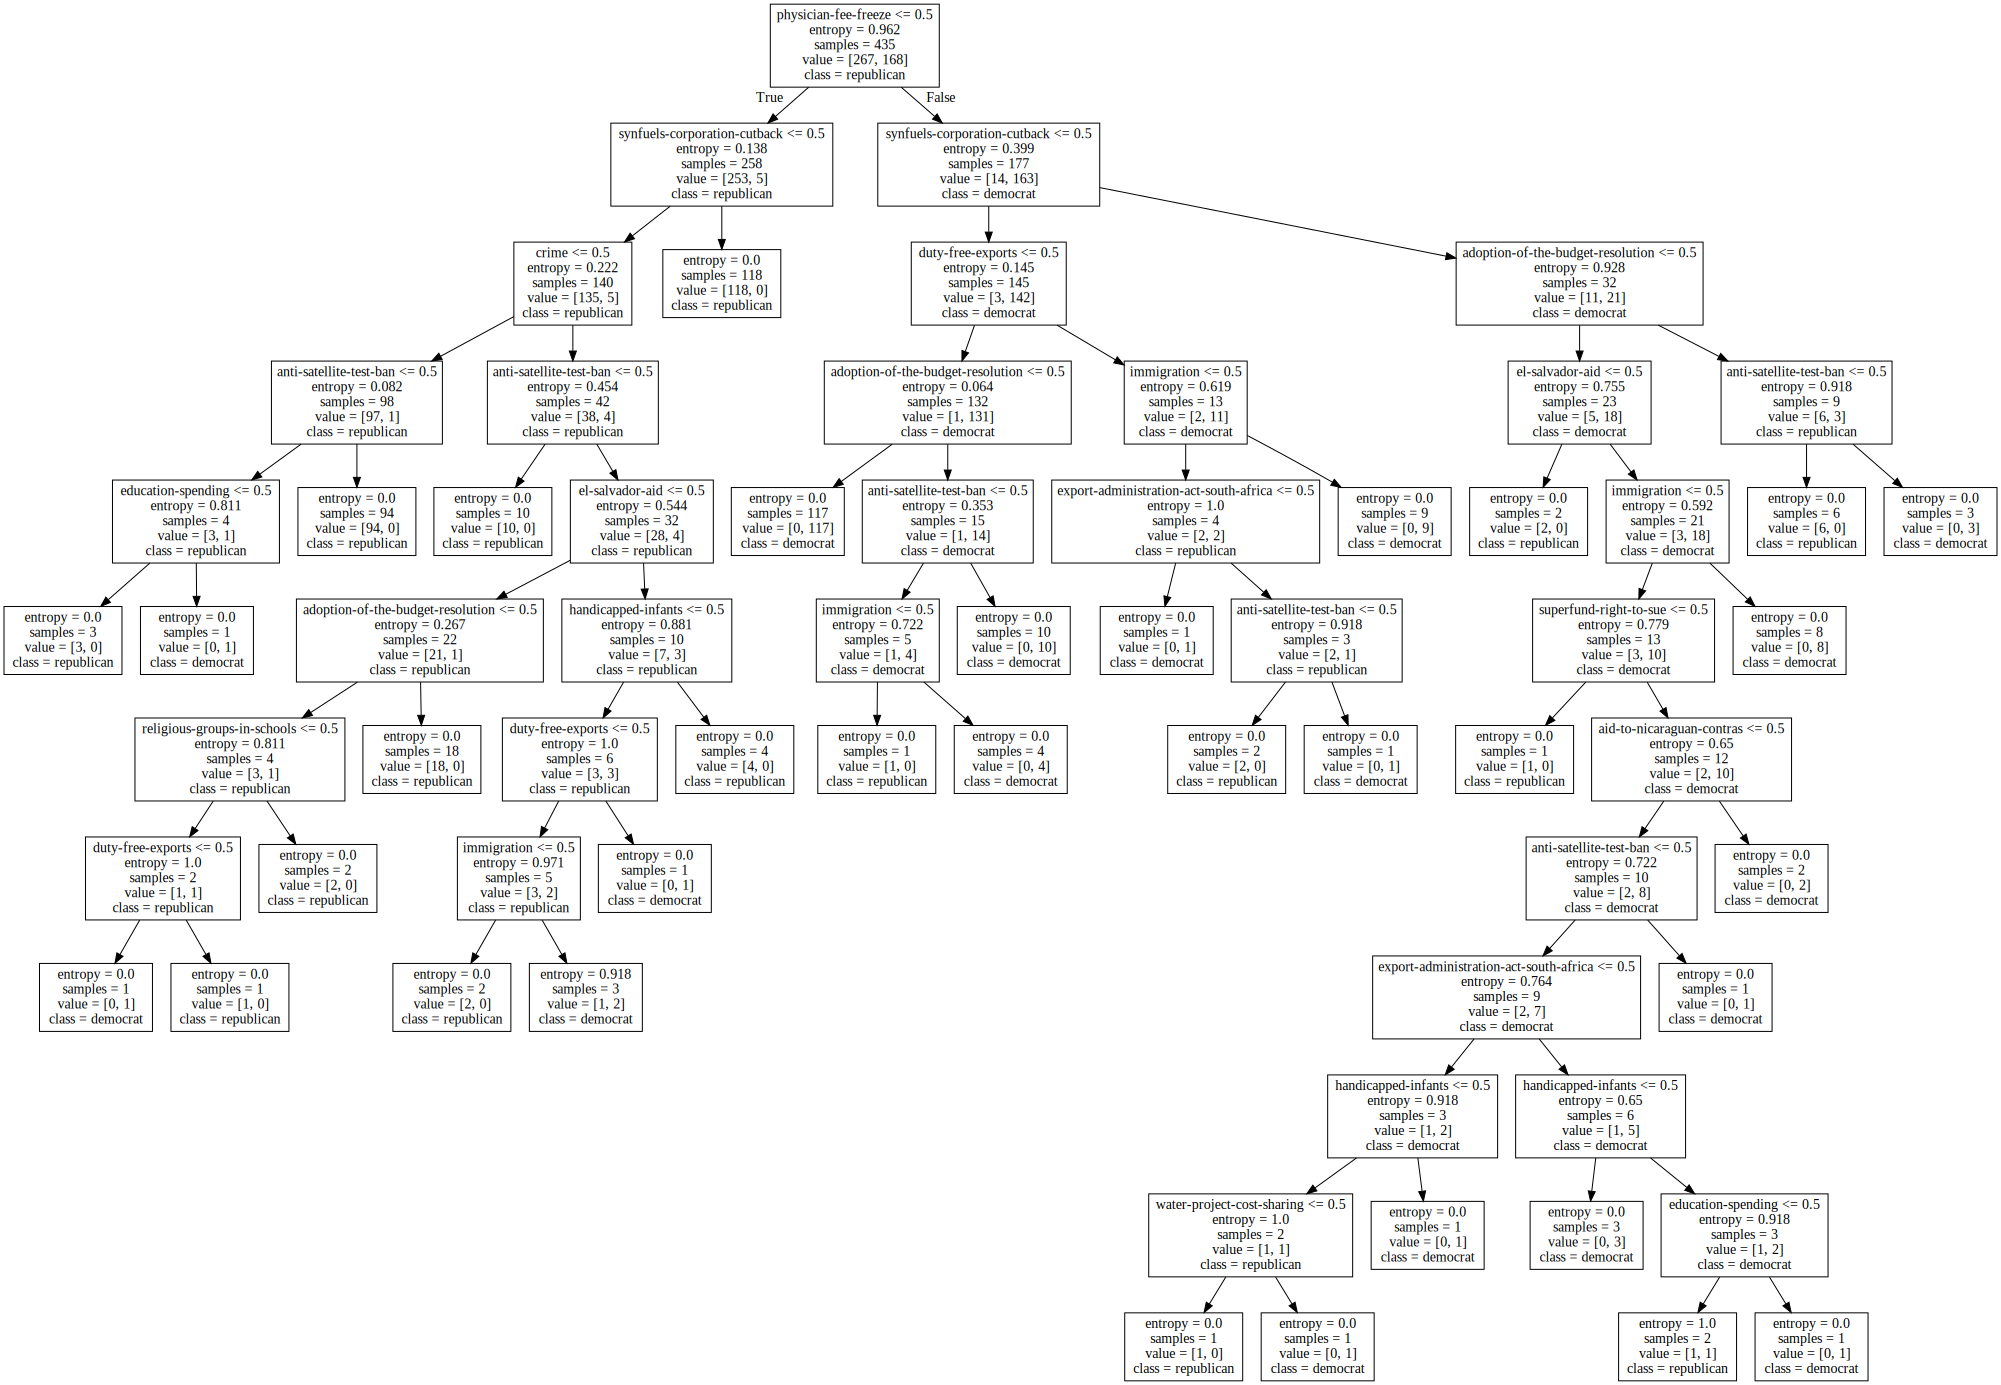

In [19]:
### Initiate classifier
infoGain_clf2 = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

### Fit classifier
infoGain_clf_tree2 = infoGain_clf2.fit(x2, y2)

ss2 = StringIO()

sklearn.tree.export_graphviz(infoGain_clf_tree2, feature_names=feature_names,
                             class_names=label_name,
                             label="all", out_file=ss2)
graphviz.Source(ss2.getvalue())

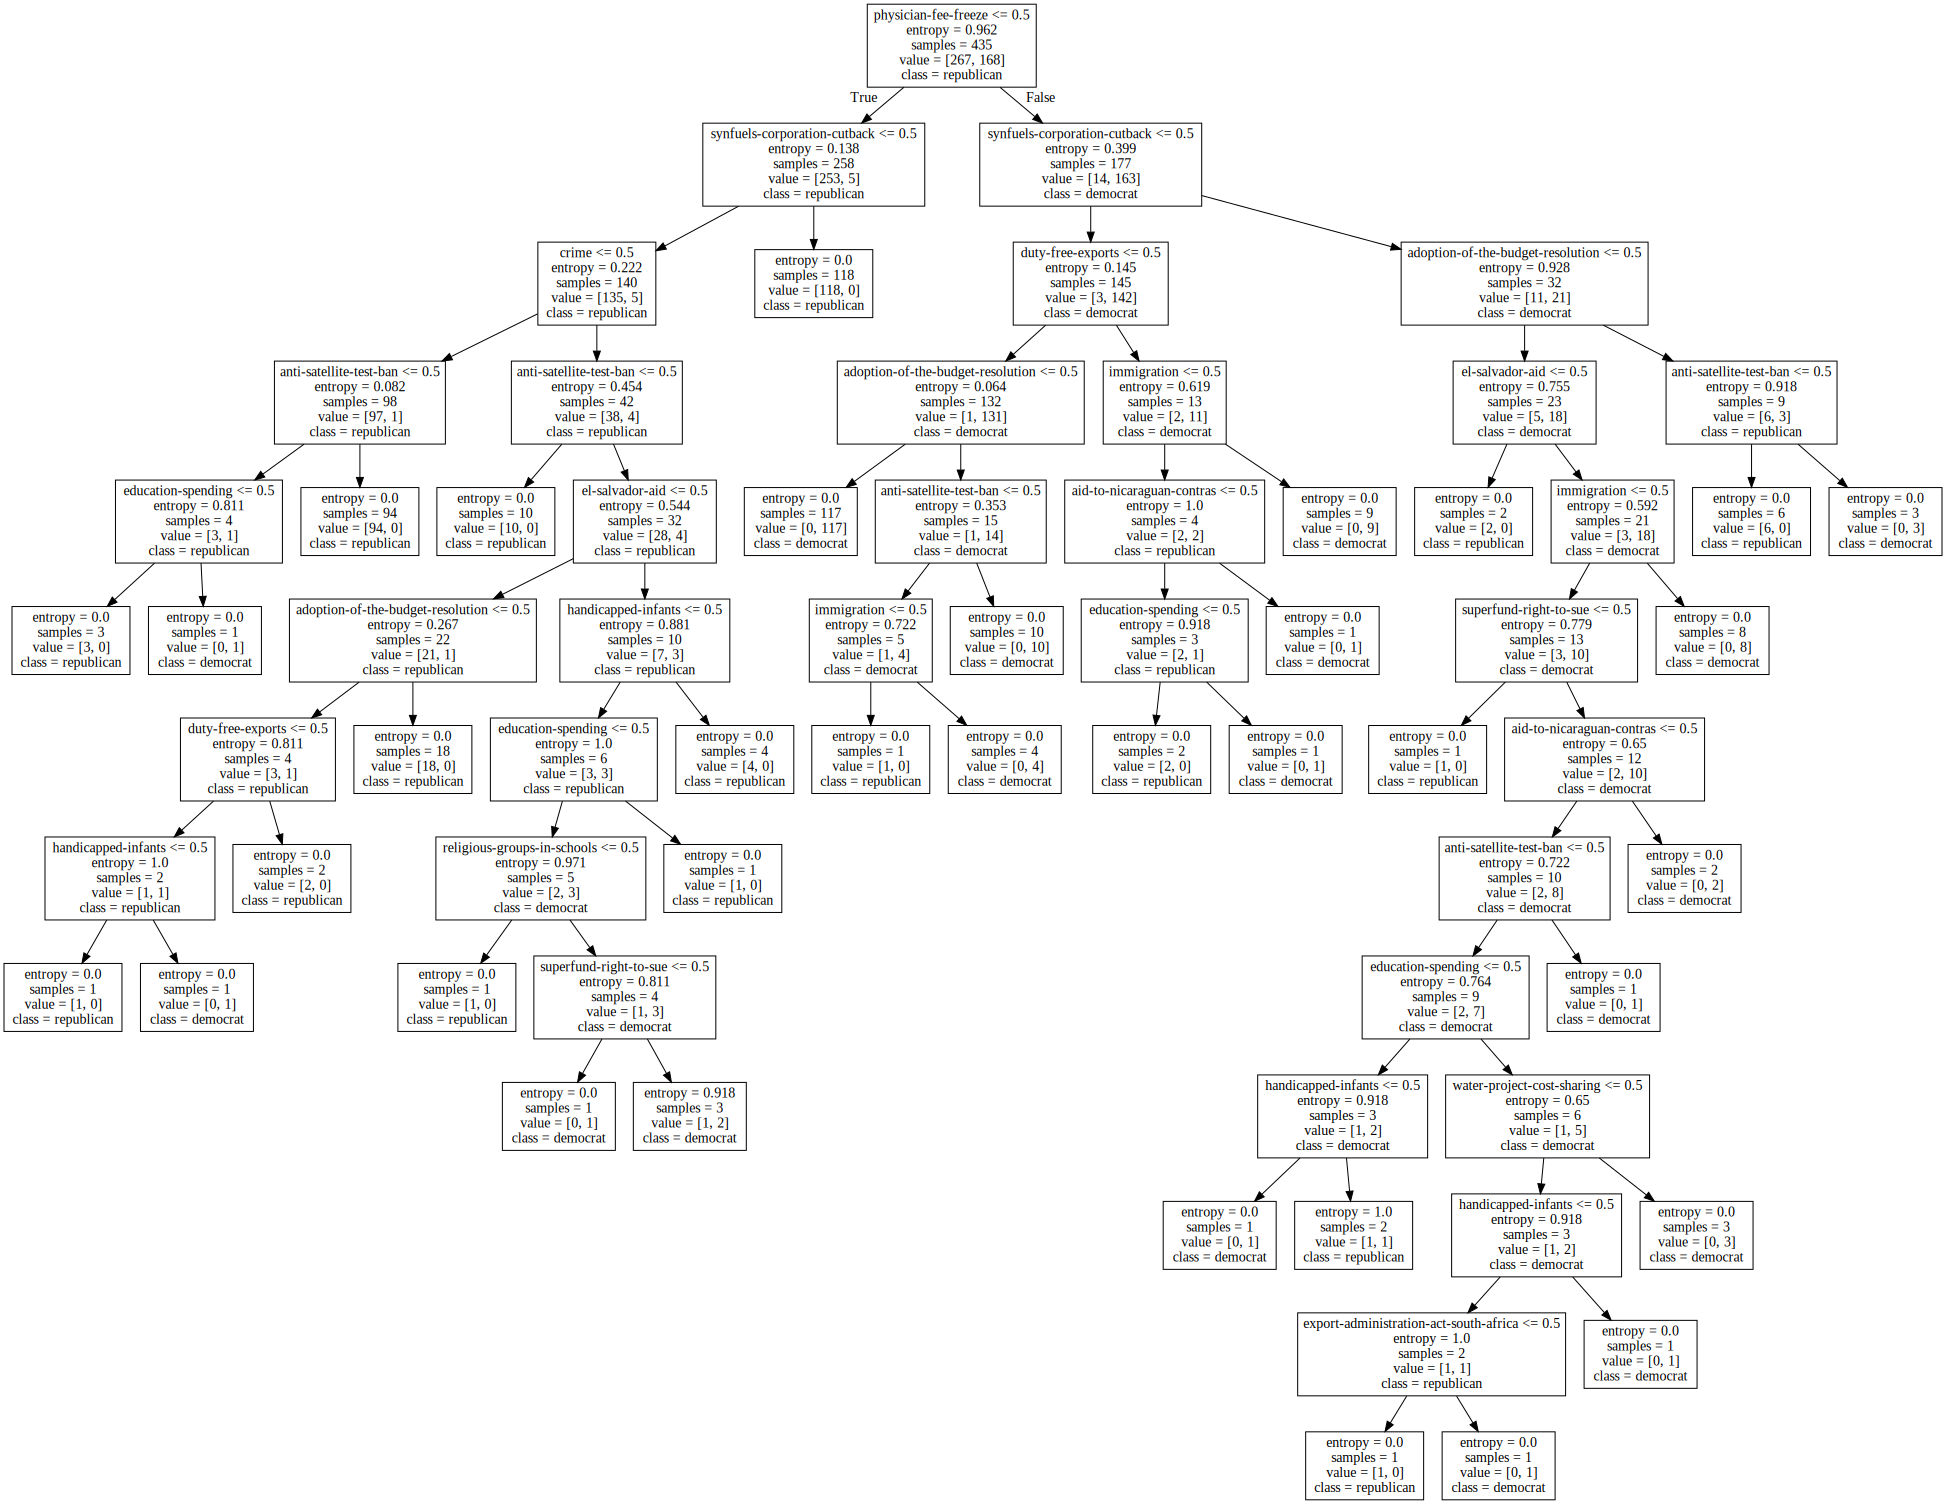

In [20]:
### Initiate classifier
infoGain_clf3 = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

### Fit classifier
infoGain_clf_tree3 = infoGain_clf3.fit(x3, y3)

ss3 = StringIO()

sklearn.tree.export_graphviz(infoGain_clf_tree3, feature_names=feature_names,
                             class_names=label_name,
                             label="all", out_file=ss3)
graphviz.Source(ss3.getvalue())

In [21]:
#1st of 2nd scenario
x2_1 = myScenario2Array[:,1:]
y2 = myScenario2Array[:,0]
x2_1[x2_1 == 'n'] = 0
x2_1[x2_1 == 'y'] = 1
x2_1[x2_1 == '?'] = 'NaN'

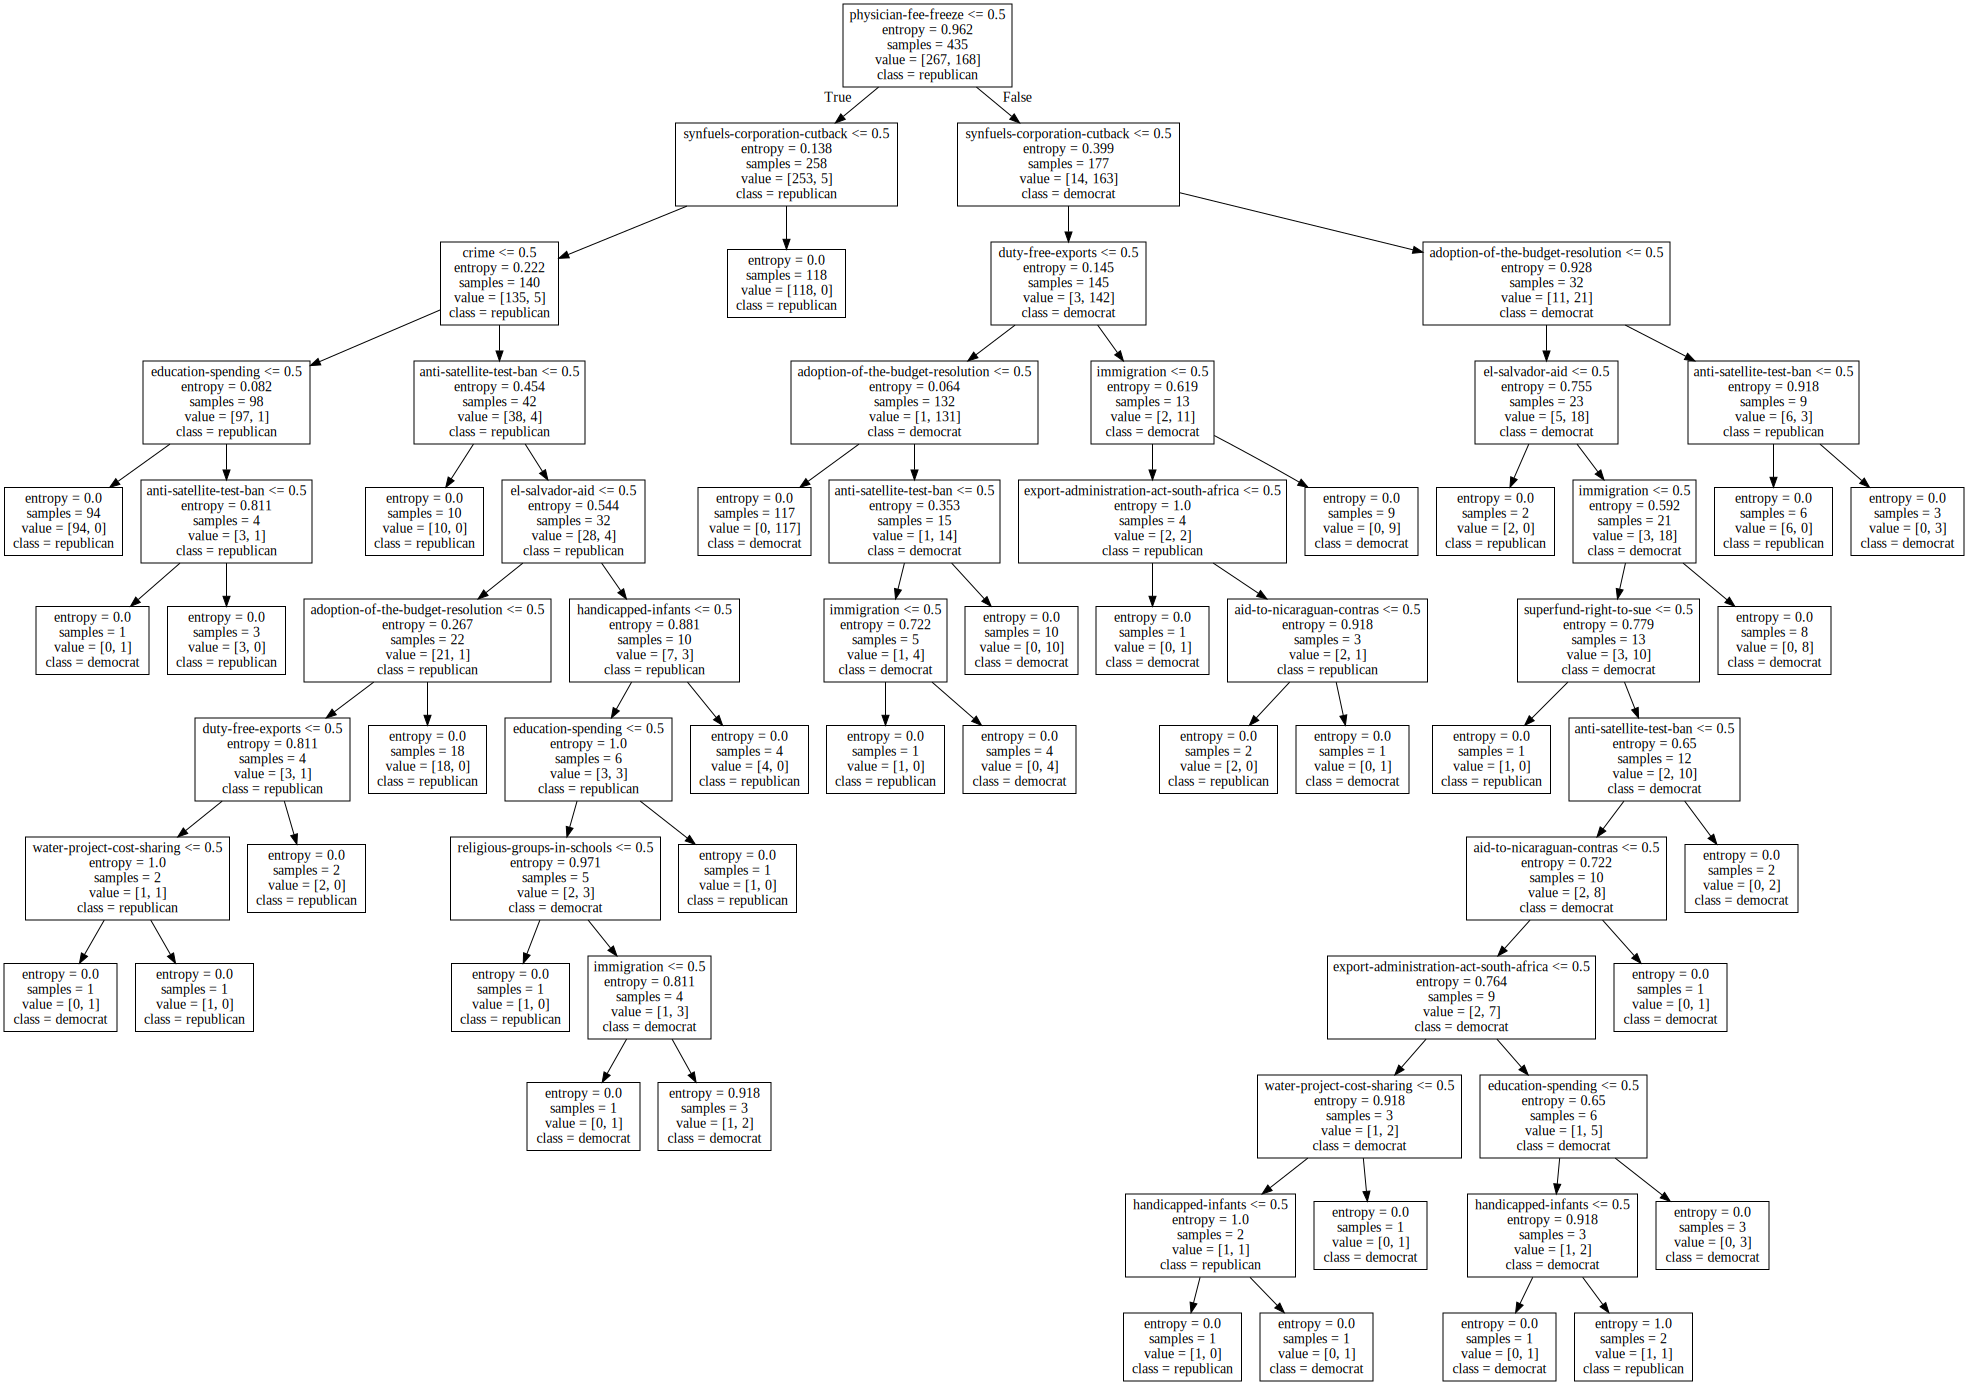

In [22]:
### Initiate classifier
infoGain_clf2_1 = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

### Fit classifier
infoGain_clf_tree2_1 = infoGain_clf2_1.fit(x2_1, y2)

ss2_1 = StringIO()

sklearn.tree.export_graphviz(infoGain_clf_tree2_1, feature_names=feature_names,
                             class_names=label_name,
                             label="all", out_file=ss2_1)
graphviz.Source(ss2_1.getvalue())

In [23]:
print("predicted:", infoGain_clf_tree1.predict(x1[-2:,:]))
print("truth", y1[-2:])

('predicted:', array(['republican', 'democrat'], dtype='|S10'))
('truth', array(['republican', 'democrat'], dtype='|S10'))


In [24]:
print("predicted:", infoGain_clf_tree2.predict(x2[-2:,:]))
print("truth", y2[-2:])

('predicted:', array(['republican', 'republican'], dtype='|S10'))
('truth', array(['republican', 'republican'], dtype='|S10'))


In [25]:
print("predicted:", infoGain_clf_tree3.predict(x3[-2:,:]))
print("truth", y3[-2:])

('predicted:', array(['republican', 'republican'], dtype='|S10'))
('truth', array(['republican', 'republican'], dtype='|S10'))


In [26]:
bayes_clf = BernoulliNB()
x1 = x1.astype(float)
bayes_clf.fit(x1, y1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
bayes_clf2 = BernoulliNB()
x2 = x2.astype(float)
bayes_clf2.fit(x2, y2)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
bayes_clf3 = BernoulliNB()
x3 = x3.astype(float)
bayes_clf3.fit(x3, y3)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
print "predicted:", bayes_clf.predict(x1[-10:,:])
print "truth", y1[-10:]

predicted: ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat']
truth ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'democrat']


In [30]:
print "predicted:", bayes_clf2.predict(x2[-10:,:])
print "truth", y2[-10:]

predicted: ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican']
truth ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican']


In [31]:
print "predicted:", bayes_clf3.predict(x3[-10:,:])
print "truth", y3[-10:]

predicted: ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican']
truth ['democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican']


In [33]:
# from sklearn import linear_model, datasets
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics


# logreg = linear_model.LogisticRegression()
# X_train, X_test, y_train, y_test = train_test_split(x1, x1, test_size=0.2, random_state=0)

# logreg.fit(X_train, y_train)
# probs = logreg.predict_proba(X_test)
# print probs

# predicted = logreg.predict(X_test)

# print metrics.confusion_matrix(y_test, predicted)
# print metrics.classification_report(y_test, predicted)

In [2]:
from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits=5)
kf.get_n_splits(x1)

NameError: name 'x1' is not defined

In [35]:
xScenario1Array = myScenario1Array
xScenario1Array[xScenario1Array == 'n'] = 0
xScenario1Array[xScenario1Array == 'y'] = 1

for train_index, test_index in kf.split(x1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x1_train, x1_test = x1[train_index], x1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    infoGain_clf_tree = infoGain_clf.fit(x1_train, y1_train)
    
    predicted = infoGain_clf_tree.predict(x1_test)
    
    print metrics.classification_report(y1_test, predicted)
    
    
    

             precision    recall  f1-score   support

   democrat       1.00      0.92      0.96        24
 republican       0.92      1.00      0.96        23

avg / total       0.96      0.96      0.96        47

             precision    recall  f1-score   support

   democrat       1.00      0.93      0.96        28
 republican       0.90      1.00      0.95        19

avg / total       0.96      0.96      0.96        47

             precision    recall  f1-score   support

   democrat       0.97      1.00      0.98        28
 republican       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        46

             precision    recall  f1-score   support

   democrat       0.90      0.95      0.93        20
 republican       0.96      0.92      0.94        26

avg / total       0.94      0.93      0.93        46

             precision    recall  f1-score   support

   democrat       0.91      0.88      0.89        24
 republican       0.87      0.91 

In [36]:
for train_index, test_index in kf.split(x2):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x2_train, x2_test = x2[train_index], x2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    infoGain_clf_tree = infoGain_clf.fit(x2_train, y2_train)
    
    predicted = infoGain_clf_tree.predict(x2_test)
    
    print metrics.classification_report(y2_test, predicted)

             precision    recall  f1-score   support

   democrat       0.96      0.98      0.97        52
 republican       0.97      0.94      0.96        35

avg / total       0.97      0.97      0.97        87

             precision    recall  f1-score   support

   democrat       0.98      0.94      0.96        53
 republican       0.92      0.97      0.94        34

avg / total       0.96      0.95      0.95        87

             precision    recall  f1-score   support

   democrat       0.98      0.95      0.96        56
 republican       0.91      0.97      0.94        31

avg / total       0.96      0.95      0.95        87

             precision    recall  f1-score   support

   democrat       0.93      0.96      0.94        53
 republican       0.94      0.88      0.91        34

avg / total       0.93      0.93      0.93        87

             precision    recall  f1-score   support

   democrat       0.98      0.92      0.95        53
 republican       0.89      0.97 

In [37]:
for train_index, test_index in kf.split(x3):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x3_train, x3_test = x3[train_index], x3[test_index]
    y3_train, y3_test = y3[train_index], y3[test_index]
    infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    infoGain_clf_tree = infoGain_clf.fit(x3_train, y3_train)
    
    predicted = infoGain_clf_tree.predict(x3_test)
    
    print metrics.classification_report(y3_test, predicted)

             precision    recall  f1-score   support

   democrat       0.96      0.98      0.97        52
 republican       0.97      0.94      0.96        35

avg / total       0.97      0.97      0.97        87

             precision    recall  f1-score   support

   democrat       0.98      0.96      0.97        53
 republican       0.94      0.97      0.96        34

avg / total       0.97      0.97      0.97        87

             precision    recall  f1-score   support

   democrat       0.98      0.93      0.95        56
 republican       0.88      0.97      0.92        31

avg / total       0.95      0.94      0.94        87

             precision    recall  f1-score   support

   democrat       0.93      0.98      0.95        53
 republican       0.97      0.88      0.92        34

avg / total       0.94      0.94      0.94        87

             precision    recall  f1-score   support

   democrat       0.98      0.91      0.94        53
 republican       0.87      0.97 

In [38]:
for train_index, test_index in kf.split(x1):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x1_train, x1_test = x1[train_index], x1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    bayes_clf = BernoulliNB()
    x1_train = x1_train.astype(float)
    bayes_clf.fit(x1_train, y1_train)
    
    predicted = bayes_clf.predict(x1_test)
    
    print metrics.classification_report(y1_test, predicted)

             precision    recall  f1-score   support

   democrat       0.95      0.83      0.89        24
 republican       0.85      0.96      0.90        23

avg / total       0.90      0.89      0.89        47

             precision    recall  f1-score   support

   democrat       0.88      0.82      0.85        28
 republican       0.76      0.84      0.80        19

avg / total       0.84      0.83      0.83        47

             precision    recall  f1-score   support

   democrat       0.97      1.00      0.98        28
 republican       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        46

             precision    recall  f1-score   support

   democrat       1.00      1.00      1.00        20
 republican       1.00      1.00      1.00        26

avg / total       1.00      1.00      1.00        46

             precision    recall  f1-score   support

   democrat       0.95      0.79      0.86        24
 republican       0.81      0.95 

In [39]:
for train_index, test_index in kf.split(x2):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x2_train, x2_test = x2[train_index], x2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    
    bayes_clf = BernoulliNB()
    x2_train = x2_train.astype(float)
    bayes_clf.fit(x2_train, y2_train)
    
    predicted = bayes_clf.predict(x2_test)
    
    print metrics.classification_report(y2_test, predicted)

             precision    recall  f1-score   support

   democrat       0.96      0.88      0.92        52
 republican       0.85      0.94      0.89        35

avg / total       0.91      0.91      0.91        87

             precision    recall  f1-score   support

   democrat       0.94      0.83      0.88        53
 republican       0.78      0.91      0.84        34

avg / total       0.87      0.86      0.86        87

             precision    recall  f1-score   support

   democrat       0.95      0.98      0.96        56
 republican       0.97      0.90      0.93        31

avg / total       0.95      0.95      0.95        87

             precision    recall  f1-score   support

   democrat       0.94      0.96      0.95        53
 republican       0.94      0.91      0.93        34

avg / total       0.94      0.94      0.94        87

             precision    recall  f1-score   support

   democrat       0.93      0.79      0.86        53
 republican       0.74      0.91 

In [40]:
for train_index, test_index in kf.split(x3):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x3_train, x3_test = x3[train_index], x3[test_index]
    y3_train, y3_test = y3[train_index], y3[test_index]
    
    bayes_clf = BernoulliNB()
    x3_train = x3_train.astype(float)
    bayes_clf.fit(x3_train, y3_train)
    
    predicted = bayes_clf.predict(x3_test)
    
    print metrics.classification_report(y3_test, predicted)

             precision    recall  f1-score   support

   democrat       0.96      0.88      0.92        52
 republican       0.85      0.94      0.89        35

avg / total       0.91      0.91      0.91        87

             precision    recall  f1-score   support

   democrat       0.94      0.83      0.88        53
 republican       0.78      0.91      0.84        34

avg / total       0.87      0.86      0.86        87

             precision    recall  f1-score   support

   democrat       0.95      0.98      0.96        56
 republican       0.97      0.90      0.93        31

avg / total       0.95      0.95      0.95        87

             precision    recall  f1-score   support

   democrat       0.94      0.96      0.95        53
 republican       0.94      0.91      0.93        34

avg / total       0.94      0.94      0.94        87

             precision    recall  f1-score   support

   democrat       0.93      0.79      0.86        53
 republican       0.74      0.91 